<a href="https://colab.research.google.com/github/insyspo/scielo/blob/main/SciELO_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of metadata in SciELO and OpenAlex

Using cloud stored versions of both OpenAlex and SciELO, we match works with available DOIs and check differences in presence of metadata.

In [ ]:
# Only if you are running in Colab. For locally running, follow instructions on
# local instalation of Python, Google Authentication.

from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


Works with DOIs.

In [ ]:
%%bigquery --project=insyspo

DROP TABLE IF EXISTS insyspo.projectdb_scielo_rm.scielo_dois;
CREATE TABLE insyspo.projectdb_scielo_rm.scielo_dois AS (
  SELECT *
  FROM insyspo.projectdb_scielo_relational_model.works
  WHERE doi IS NOT NULL
)

Query is running:   0%|          |

""


# DOIs with repetitions - problem

In [ ]:
%%bigquery --project=insyspo

SELECT a.id, a.doi, COUNT(*) AS n
FROM insyspo.projectdb_scielo_rm.scielo_dois AS a
LEFT JOIN insyspo.publicdb_openalex_2022_04.works AS b
ON a.doi = SUBSTR(b.doi,17)
GROUP BY a.id, a.doi
ORDER BY n DESC

Query is running:   0%|          |

Downloading:   0%|          |

,id,doi,n
0,S1665-11462014000600002,10.1016/j.bmhimx.2015.01.004,243
1,S0100-29452018000200704,10.1590/0100-29452018528,218
2,S0012-73532014000400020,10.15446/dyna.v81n186.39760,207
3,S0104-77602017000400423,10.1590/01047760201723042303,204
4,S0122-87062018000300645,10.21930/rcta.vol19_num2_art:684,203
...,...,...,...
700027,S1806-11172020000100501,10.1590/1806-9126-rbef-2019-0021,1
700028,S2007-33642020000100151,10.12933/therya-20-768,1
700029,S2237-60892012000100003,10.1590/S2237-60892012000100003,1
700030,S2305-08532016000100004,10.4102/ids.v50i1.1908,1


In [ ]:
%%bigquery --project=insyspo

SELECT *
FROM  insyspo.publicdb_openalex_2022_04.works
WHERE SUBSTR(doi,17) = '10.1016/j.bmhimx.2015.01.004'

Query is running:   0%|          |

Downloading:   0%|          |

,id,doi,title,display_name,publication_year,publication_date,type,cited_by_count,is_retracted,is_paratext,cited_by_api_url,abstract_inverted_index
0,https://openalex.org/W3180504170,https://doi.org/10.1016/j.bmhimx.2015.01.004,Máquina para bolsas de papel blanco de alta ar...,Máquina para bolsas de papel blanco de alta ar...,2014,2014-12-01,journal-article,0,False,False,https://api.openalex.org/works?filter=cites:W3...,{}
1,https://openalex.org/W3182648436,https://doi.org/10.1016/j.bmhimx.2015.01.004,Ilda Moving-Head RGB Animación en etapa de la ...,Ilda Moving-Head RGB Animación en etapa de la ...,2014,2014-12-01,journal-article,0,False,False,https://api.openalex.org/works?filter=cites:W3...,{}
2,https://openalex.org/W3180494158,https://doi.org/10.1016/j.bmhimx.2015.01.004,Acero inoxidable de grado alimentario de 3 vía...,Acero inoxidable de grado alimentario de 3 vía...,2014,2014-12-01,journal-article,0,False,False,https://api.openalex.org/works?filter=cites:W3...,{}
3,https://openalex.org/W3181611689,https://doi.org/10.1016/j.bmhimx.2015.01.004,Auto servicio de OEM de altavoz para accesorio...,Auto servicio de OEM de altavoz para accesorio...,2014,2014-12-01,journal-article,0,False,False,https://api.openalex.org/works?filter=cites:W3...,{}
4,https://openalex.org/W3179994436,https://doi.org/10.1016/j.bmhimx.2015.01.004,Cruce caliente G550 el espesor de disco duro c...,Cruce caliente G550 el espesor de disco duro c...,2014,2014-12-01,journal-article,0,False,False,https://api.openalex.org/works?filter=cites:W3...,{}
...,...,...,...,...,...,...,...,...,...,...,...,...
238,https://openalex.org/W3178300146,https://doi.org/10.1016/j.bmhimx.2015.01.004,América del Norte moderno gabinete de vanidade...,América del Norte moderno gabinete de vanidade...,2014,2014-12-01,journal-article,0,False,False,https://api.openalex.org/works?filter=cites:W3...,{}
239,https://openalex.org/W3181825707,https://doi.org/10.1016/j.bmhimx.2015.01.004,Homogeneizador Mezclador al vacío con la parte...,Homogeneizador Mezclador al vacío con la parte...,2014,2014-12-01,journal-article,0,False,False,https://api.openalex.org/works?filter=cites:W3...,{}
240,https://openalex.org/W3179698338,https://doi.org/10.1016/j.bmhimx.2015.01.004,Qtj4-28 de bloques de concreto máquina de fabr...,Qtj4-28 de bloques de concreto máquina de fabr...,2014,2014-12-01,journal-article,0,False,False,https://api.openalex.org/works?filter=cites:W3...,{}
241,https://openalex.org/W3178940781,https://doi.org/10.1016/j.bmhimx.2015.01.004,2014 Nueva calidad LED de alta potencia LED fa...,2014 Nueva calidad LED de alta potencia LED fa...,2014,2014-12-01,journal-article,0,False,False,https://api.openalex.org/works?filter=cites:W3...,{}


# Comparison of metadata

In [ ]:
T = pd.DataFrame({'metric':[],'Equal':[],'Larger SciELO': [], 'Larger OpenAlex': [],'Total':[]})

## Authors

In [ ]:
%%bigquery authors_scielo_openalex --project=insyspo

WITH match_scielo_oa AS (
  SELECT a.id AS scielo_id, a.doi AS doi, b.id AS oa_id
  FROM insyspo.projectdb_scielo_rm.scielo_dois AS a
  LEFT JOIN insyspo.publicdb_openalex_2022_04.works AS b
  ON LOWER(a.doi) = LOWER(SUBSTR(b.doi,17))
  ORDER BY a.id
)
SELECT doi,
  MAX(b.author_order) AS n_authors_scielo,
  COUNT(DISTINCT(c.author_id)) AS n_authors_oa,
  MAX(b.author_order)=COUNT(DISTINCT(c.author_id)) AS n_equal,
  MAX(b.author_order)>COUNT(DISTINCT(c.author_id)) AS n_scielo_larger,
FROM match_scielo_oa AS a
LEFT JOIN insyspo.projectdb_scielo_rm.works_authors AS b
ON a.scielo_id = b.id
LEFT JOIN insyspo.publicdb_openalex_2022_04.works_authorships AS c
ON a.oa_id = c.work_id
GROUP BY doi

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
equal = authors_scielo_openalex['n_equal'].sum()
scielo_larger =  authors_scielo_openalex['n_scielo_larger'].sum()
n = authors_scielo_openalex.shape[0]
openalex_larger =  n-equal-scielo_larger

xticks = ['Equal','Larger SciELO','Larger OpenAlex','Total']
x = [equal,scielo_larger,openalex_larger,n]
Ti = pd.DataFrame({'metric':['authors'],'Equal':[equal],'Larger SciELO': [scielo_larger], 'Larger OpenAlex': [openalex_larger],'Total':[n]})
T = pd.concat((T,Ti),axis='index')

## Affiliations

In [ ]:
%%bigquery affiliations_scielo_openalex --project=insyspo

WITH match_scielo_oa AS (
  SELECT a.id AS scielo_id, a.doi AS doi, b.id AS oa_id
  FROM insyspo.projectdb_scielo_rm.scielo_dois AS a
  LEFT JOIN insyspo.publicdb_openalex_2022_04.works AS b
  ON LOWER(a.doi) = LOWER(SUBSTR(b.doi,17))
  ORDER BY a.id
)
SELECT doi,
  MAX(b.affiliation_order) AS n_affiliations_scielo,
  COUNT(DISTINCT(c.institution_id)) AS n_affiliations_oa,
  MAX(b.affiliation_order)=COUNT(DISTINCT(c.institution_id)) AS n_equal,
  MAX(b.affiliation_order)>COUNT(DISTINCT(c.institution_id)) AS n_scielo_larger,
FROM match_scielo_oa AS a
LEFT JOIN insyspo.projectdb_scielo_rm.works_affiliations AS b
ON a.scielo_id = b.id
LEFT JOIN insyspo.publicdb_openalex_2022_04.works_authorships AS c
ON a.oa_id = c.work_id
GROUP BY doi

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
equal = affiliations_scielo_openalex['n_equal'].sum()
scielo_larger =  affiliations_scielo_openalex['n_scielo_larger'].sum()
n = affiliations_scielo_openalex.shape[0]
openalex_larger =  n-equal-scielo_larger

xticks = ['Equal','Larger SciELO','Larger OpenAlex','Total']
x = [equal,scielo_larger,openalex_larger,n]
Ti = pd.DataFrame({'metric':['affiliations'],'Equal':[equal],'Larger SciELO': [scielo_larger], 'Larger OpenAlex': [openalex_larger],'Total':[n]})
T = pd.concat((T,Ti),axis='index')

## References

In [ ]:
%%bigquery references_scielo_openalex --project=insyspo

WITH match_scielo_oa AS (
  SELECT a.id AS scielo_id, a.doi AS doi, b.id AS oa_id
  FROM insyspo.projectdb_scielo_rm.scielo_dois AS a
  LEFT JOIN insyspo.publicdb_openalex_2022_04.works AS b
  ON LOWER(a.doi) = LOWER(SUBSTR(b.doi,17))
  ORDER BY a.id
)
SELECT doi,
  MAX(b.reference_order) AS n_references_scielo,
  COUNT(DISTINCT(c.referenced_work_id)) AS n_references_oa,
  MAX(b.reference_order)=COUNT(DISTINCT(c.referenced_work_id)) AS n_equal,
  MAX(b.reference_order)>COUNT(DISTINCT(c.referenced_work_id)) AS n_scielo_larger,
FROM match_scielo_oa AS a
LEFT JOIN insyspo.projectdb_scielo_rm.works_references AS b
ON a.scielo_id = b.id
LEFT JOIN insyspo.publicdb_openalex_2022_04.works_referenced_works AS c
ON a.oa_id = c.work_id
GROUP BY doi

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
equal = references_scielo_openalex['n_equal'].sum()
scielo_larger =  references_scielo_openalex['n_scielo_larger'].sum()
n = references_scielo_openalex.shape[0]
openalex_larger =  n-equal-scielo_larger

xticks = ['Equal','Larger SciELO','Larger OpenAlex','Total']
x = [equal,scielo_larger,openalex_larger,n]
Ti = pd.DataFrame({'metric':['references'],'Equal':[equal],'Larger SciELO': [scielo_larger], 'Larger OpenAlex': [openalex_larger],'Total':[n]})
T = pd.concat((T,Ti),axis='index')

## Abstracts

In [ ]:
%%bigquery abstracts_scielo_openalex --project=insyspo

WITH match_scielo_oa AS (
  SELECT a.id AS scielo_id, a.doi AS doi, b.id AS oa_id
  FROM insyspo.projectdb_scielo_rm.scielo_dois AS a
  LEFT JOIN insyspo.publicdb_openalex_2022_04.works AS b
  ON LOWER(a.doi) = LOWER(SUBSTR(b.doi,17))
  ORDER BY a.id
)
SELECT a.doi,
  COUNT(b.text) AS n_abstracts_scielo,
  COUNT(c.abstract_inverted_index) AS n_abstracts_oa,
  COUNT(b.text)=COUNT(c.abstract_inverted_index) AS n_equal,
  COUNT(b.text)>COUNT(c.abstract_inverted_index) AS n_scielo_larger,
FROM match_scielo_oa AS a
LEFT JOIN insyspo.projectdb_scielo_rm.works_abstracts AS b
ON a.scielo_id = b.id
LEFT JOIN insyspo.publicdb_openalex_2022_04.works AS c
ON a.oa_id = c.id
GROUP BY a.doi

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
equal = abstracts_scielo_openalex['n_equal'].sum()
scielo_larger =  abstracts_scielo_openalex['n_scielo_larger'].sum()
n = abstracts_scielo_openalex.shape[0]
openalex_larger =  n-equal-scielo_larger

xticks = ['Equal','Larger SciELO','Larger OpenAlex','Total']
x = [equal,scielo_larger,openalex_larger,n]
Ti = pd.DataFrame({'metric':['abstracts'],'Equal':[equal],'Larger SciELO': [scielo_larger], 'Larger OpenAlex': [openalex_larger],'Total':[n]})
T = pd.concat((T,Ti),axis='index')

## DOIs of references

In [ ]:
%%bigquery doi_references_scielo_openalex --project=insyspo

WITH match_scielo_oa AS (
  SELECT a.id AS scielo_id, a.doi AS doi, b.id AS oa_id
  FROM insyspo.projectdb_scielo_rm.scielo_dois AS a
  LEFT JOIN insyspo.publicdb_openalex_2022_04.works AS b
  ON LOWER(a.doi) = LOWER(SUBSTR(b.doi,17))
  ORDER BY a.id
)
SELECT a.doi,
  COUNTIF(b.uri LIKE '%doi%') AS n_doi_refs_scielo,
  COUNT(d.doi) AS n_doi_refs_oa,
  COUNTIF(b.uri LIKE '%doi%')=COUNT(d.doi) AS n_equal,
  COUNTIF(b.uri LIKE '%doi%')>COUNT(d.doi) AS n_scielo_larger,
FROM match_scielo_oa AS a
LEFT JOIN insyspo.projectdb_scielo_rm.works_references AS b
ON a.scielo_id = b.id
LEFT JOIN insyspo.publicdb_openalex_2022_04.works_referenced_works AS c
ON a.oa_id = c.work_id
LEFT JOIN insyspo.publicdb_openalex_2022_04.works AS d
ON c.referenced_work_id = d.id
GROUP BY a.doi

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
equal = doi_references_scielo_openalex['n_equal'].sum()
scielo_larger =  doi_references_scielo_openalex['n_scielo_larger'].sum()
n = doi_references_scielo_openalex.shape[0]
openalex_larger =  n-equal-scielo_larger

xticks = ['Equal','Larger SciELO','Larger OpenAlex','Total']
x = [equal,scielo_larger,openalex_larger,n]
Ti = pd.DataFrame({'metric':['dois of references'],'Equal':[equal],'Larger SciELO': [scielo_larger], 'Larger OpenAlex': [openalex_larger],'Total':[n]})
T = pd.concat((T,Ti),axis='index')

## Results' table

In [ ]:
T

,metric,Equal,Larger SciELO,Larger OpenAlex,Total
0,authors,593832.0,51050.0,42282.0,687164.0
0,affiliations,269767.0,338797.0,78600.0,687164.0
0,references,6244.0,645877.0,35043.0,687164.0
0,abstracts,541271.0,26052.0,119841.0,687164.0
0,dois of references,549136.0,67037.0,70991.0,687164.0


# Comparison of metadata along time

## Authors

In [ ]:
%%bigquery authors_scielo_openalex --project=insyspo

SELECT SUM(IF(n_equal,1,0)) AS n_equal,
  SUM(IF(n_scielo_larger,1,0)) AS n_scielo_larger,
  COUNT(*) AS total,
  publication_year
FROM (
    WITH match_scielo_oa AS (
      SELECT a.id AS scielo_id, a.doi AS doi, b.id AS oa_id, b.publication_year
      FROM insyspo.projectdb_scielo_rm.scielo_dois AS a
      LEFT JOIN insyspo.publicdb_openalex_2024_02_rm.works AS b
      ON LOWER(a.doi) = LOWER(SUBSTR(b.doi,17))
      ORDER BY a.id
    )
    SELECT doi,
      MAX(b.author_order) AS n_authors_scielo,
      COUNT(DISTINCT(c.author_id)) AS n_authors_oa,
      MAX(b.author_order)=COUNT(DISTINCT(c.author_id)) AS n_equal,
      MAX(b.author_order)>COUNT(DISTINCT(c.author_id)) AS n_scielo_larger,
      publication_year
    FROM match_scielo_oa AS a
    LEFT JOIN insyspo.projectdb_scielo_rm.works_authors AS b
    ON a.scielo_id = b.id
    LEFT JOIN insyspo.publicdb_openalex_2024_02_rm.works_authorships AS c
    ON a.oa_id = c.work_id
    WHERE publication_year IS NOT NULL
      AND publication_year > 1990
      AND publication_year < 2021
    GROUP BY doi, publication_year
)
GROUP BY publication_year
ORDER BY publication_year ASC

Query is running:   0%|          |

Downloading:   0%|          |

Text(0.5, 1.0, 'Authors')

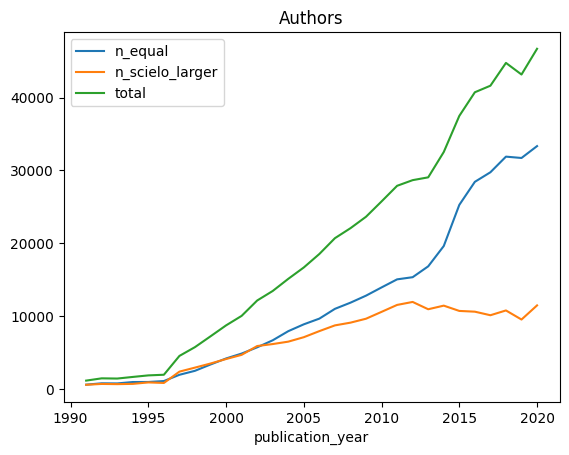

In [ ]:
authors_scielo_openalex.plot.line(x='publication_year')
plt.title('Authors')

## Affiliations

In [ ]:
%%bigquery affiliations_scielo_openalex --project=insyspo


SELECT SUM(IF(n_equal,1,0)) AS n_equal,
  SUM(IF(n_scielo_larger,1,0)) AS n_scielo_larger,
  COUNT(*) AS total,
  publication_year
FROM (
  WITH match_scielo_oa AS (
    SELECT a.id AS scielo_id, a.doi AS doi, b.id AS oa_id, b.publication_year
    FROM insyspo.projectdb_scielo_rm.scielo_dois AS a
    LEFT JOIN insyspo.publicdb_openalex_2024_02_rm.works AS b
    ON LOWER(a.doi) = LOWER(SUBSTR(b.doi,17))
    ORDER BY a.id
  )
  SELECT doi,
    MAX(b.affiliation_order) AS n_affiliations_scielo,
    COUNT(DISTINCT(c.institution_id)) AS n_affiliations_oa,
    MAX(b.affiliation_order)=COUNT(DISTINCT(c.institution_id)) AS n_equal,
    MAX(b.affiliation_order)>COUNT(DISTINCT(c.institution_id)) AS n_scielo_larger,
    a.publication_year
  FROM match_scielo_oa AS a
  LEFT JOIN insyspo.projectdb_scielo_rm.works_affiliations AS b
  ON a.scielo_id = b.id
  LEFT JOIN insyspo.publicdb_openalex_2024_02_rm.works_authorships AS c
  ON a.oa_id = c.work_id
  WHERE publication_year IS NOT NULL
      AND publication_year > 1990
      AND publication_year < 2021
  GROUP BY doi, publication_year
)
GROUP BY publication_year
ORDER BY publication_year ASC

Query is running:   0%|          |

Downloading:   0%|          |

Text(0.5, 1.0, 'Affiliations')

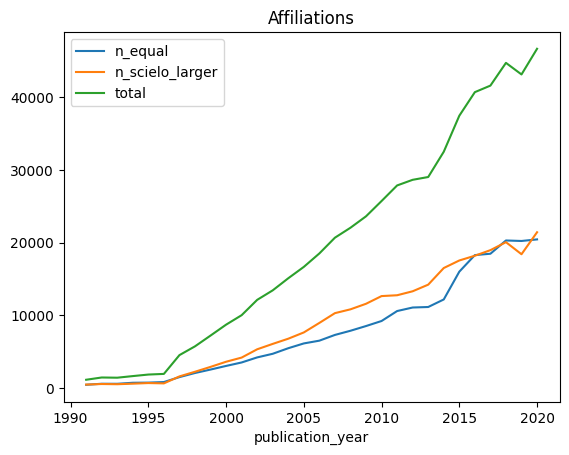

In [ ]:
affiliations_scielo_openalex.plot.line(x='publication_year')
plt.title('Affiliations')

## References

In [ ]:
%%bigquery references_scielo_openalex --project=insyspo

SELECT SUM(IF(n_equal,1,0)) AS n_equal,
  SUM(IF(n_scielo_larger,1,0)) AS n_scielo_larger,
  COUNT(*) AS total,
  publication_year
FROM (
  WITH match_scielo_oa AS (
    SELECT a.id AS scielo_id, a.doi AS doi, b.id AS oa_id, b.publication_year
    FROM insyspo.projectdb_scielo_rm.scielo_dois AS a
    LEFT JOIN insyspo.publicdb_openalex_2024_02_rm.works AS b
    ON LOWER(a.doi) = LOWER(SUBSTR(b.doi,17))
    ORDER BY a.id
  )
  SELECT doi,
    MAX(b.reference_order) AS n_references_scielo,
    COUNT(DISTINCT(c.referenced_work_id)) AS n_references_oa,
    MAX(b.reference_order)=COUNT(DISTINCT(c.referenced_work_id)) AS n_equal,
    MAX(b.reference_order)>COUNT(DISTINCT(c.referenced_work_id)) AS n_scielo_larger,
    a.publication_year
  FROM match_scielo_oa AS a
  LEFT JOIN insyspo.projectdb_scielo_rm.works_references AS b
  ON a.scielo_id = b.id
  LEFT JOIN insyspo.publicdb_openalex_2024_02_rm.works_referenced_works AS c
  ON a.oa_id = c.work_id
  WHERE a.publication_year IS NOT NULL
      AND publication_year > 1990
      AND publication_year < 2021
  GROUP BY doi, publication_year
)
GROUP BY publication_year
ORDER BY publication_year ASC

Query is running:   0%|          |

Downloading:   0%|          |

Text(0.5, 1.0, 'References')

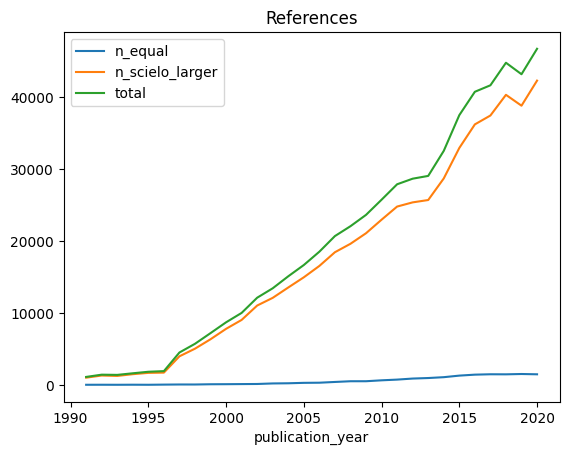

In [ ]:
references_scielo_openalex.plot.line(x='publication_year')
plt.title('References')

## Abstracts

In [ ]:
%%bigquery abstracts_scielo_openalex --project=insyspo

SELECT SUM(IF(n_equal,1,0)) AS n_equal,
  SUM(IF(n_scielo_larger,1,0)) AS n_scielo_larger,
  COUNT(*) AS total,
  publication_year
FROM (
  WITH match_scielo_oa AS (
    SELECT a.id AS scielo_id, a.doi AS doi, b.id AS oa_id, b.publication_year
    FROM insyspo.projectdb_scielo_rm.scielo_dois AS a
    LEFT JOIN insyspo.publicdb_openalex_2024_02_rm.works AS b
    ON LOWER(a.doi) = LOWER(SUBSTR(b.doi,17))
    ORDER BY a.id
  )
  SELECT a.doi,
    COUNT(b.text) AS n_abstracts_scielo,
    COUNT(c.abstract_inverted_index) AS n_abstracts_oa,
    COUNT(b.text)=COUNT(c.abstract_inverted_index) AS n_equal,
    COUNT(b.text)>COUNT(c.abstract_inverted_index) AS n_scielo_larger,
    a.publication_year
  FROM match_scielo_oa AS a
  LEFT JOIN insyspo.projectdb_scielo_rm.works_abstracts AS b
  ON a.scielo_id = b.id
  LEFT JOIN insyspo.publicdb_openalex_2022_04.works AS c
  ON a.oa_id = c.id
  WHERE a.publication_year IS NOT NULL
      AND a.publication_year > 1990
      AND a.publication_year < 2021
  GROUP BY a.doi, a.publication_year
)
GROUP BY publication_year
ORDER BY publication_year ASC

Query is running:   0%|          |

Downloading:   0%|          |

Text(0.5, 1.0, 'Abstracts')

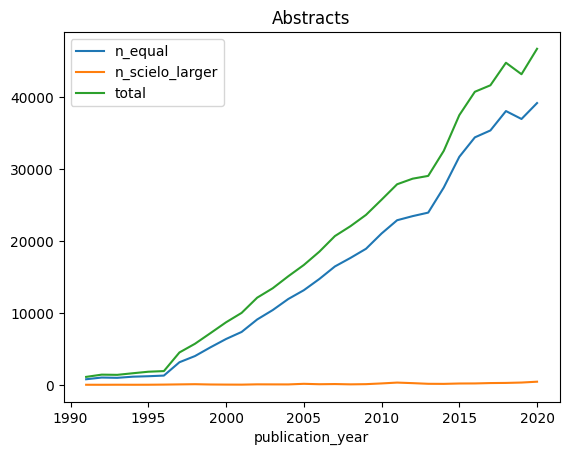

In [ ]:
abstracts_scielo_openalex.plot.line(x='publication_year')
plt.title('Abstracts')

## DOIs of references

In [ ]:
%%bigquery doi_references_scielo_openalex --project=insyspo

SELECT SUM(IF(n_equal,1,0)) AS n_equal,
  SUM(IF(n_scielo_larger,1,0)) AS n_scielo_larger,
  COUNT(*) AS total,
  publication_year
FROM (
  WITH match_scielo_oa AS (
    SELECT a.id AS scielo_id, a.doi AS doi, b.id AS oa_id, b.publication_year
    FROM insyspo.projectdb_scielo_rm.scielo_dois AS a
    LEFT JOIN insyspo.publicdb_openalex_2024_02_rm.works AS b
    ON LOWER(a.doi) = LOWER(SUBSTR(b.doi,17))
    ORDER BY a.id
  )
  SELECT a.doi,
    COUNTIF(b.uri LIKE '%doi%') AS n_doi_refs_scielo,
    COUNT(d.doi) AS n_doi_refs_oa,
    COUNTIF(b.uri LIKE '%doi%')=COUNT(d.doi) AS n_equal,
    COUNTIF(b.uri LIKE '%doi%')>COUNT(d.doi) AS n_scielo_larger,
    a.publication_year
  FROM match_scielo_oa AS a
  LEFT JOIN insyspo.projectdb_scielo_rm.works_references AS b
  ON a.scielo_id = b.id
  LEFT JOIN insyspo.publicdb_openalex_2024_02_rm.works_referenced_works AS c
  ON a.oa_id = c.work_id
  LEFT JOIN insyspo.publicdb_openalex_2024_02_rm.works AS d
  ON c.referenced_work_id = d.id
  WHERE a.publication_year IS NOT NULL
      AND a.publication_year > 1990
      AND a.publication_year < 2021
  GROUP BY a.doi, a.publication_year
)
GROUP BY publication_year
ORDER BY publication_year ASC

Query is running:   0%|          |

Downloading:   0%|          |

Text(0.5, 1.0, 'DOIs')

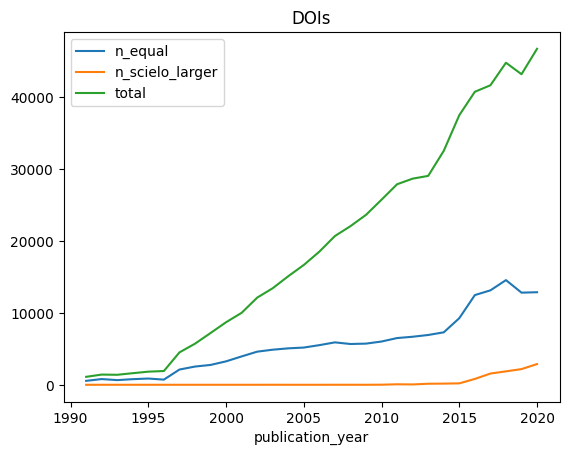

In [ ]:
doi_references_scielo_openalex.plot.line(x='publication_year')
plt.title('DOIs')

## Results' table